In [1]:
cd ../src

/Users/dani/Google Drive/Uni/Master/P4 2021/DD2424 - Deep Learning for Data Science/Project/ScarceClassifier/src


In [10]:
from d04_mixmatch.wideresnet import WideResNet
from d04_mixmatch.wideresnet_funnel import WideResNetFunnel
from d02_data.load_data import get_dataloaders_ssl
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [11]:
model_name = 'model_fs_funnel.pt'
saved_model = torch.load(f'../models/saved_models/{model_name}', map_location=torch.device('cpu')) 

model = WideResNetFunnel(depth=28, k=2, n_out=10)
model.load_state_dict(saved_model['model_state_dict'])

<All keys matched successfully>

In [12]:
from torchsummary import summary
summary(model, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 16, 16]          27,776
       BatchNorm2d-2           [-1, 32, 16, 16]              64
         LeakyReLU-3           [-1, 32, 16, 16]               0
            Conv2d-4           [-1, 64, 16, 16]           2,112
            Conv2d-5           [-1, 64, 16, 16]          18,496
       BatchNorm2d-6           [-1, 64, 16, 16]             128
         LeakyReLU-7           [-1, 64, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          36,928
   TransitionBlock-9           [-1, 64, 16, 16]               0
      BatchNorm2d-10           [-1, 64, 16, 16]             128
        LeakyReLU-11           [-1, 64, 16, 16]               0
           Conv2d-12           [-1, 64, 16, 16]          36,928
      BatchNorm2d-13           [-1, 64, 16, 16]             128
        LeakyReLU-14           [-1, 64,

In [13]:
kernels = model.conv1.weight
for i in range(kernels.shape[0]):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-13-85550bd6411d>, line 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


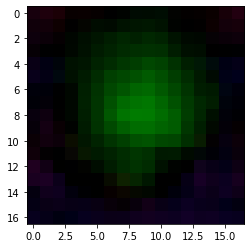

In [57]:
kernels = model.conv1.weight.detach()
plt.imshow(np.transpose(kernels[7], (1, 2, 0)))

l= [module for module in model.modules()]
l